In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics 
import matplotlib.pyplot as plt

### Loading and Preprocessing

In [4]:

df= pd.read_csv("../datasets/spam_or_ham.csv", encoding="latin1", usecols=[0,1], names=['label', 'message'])
# Remove any rows where 'label' or 'message' might be NaN

df = df.dropna(subset=['label','message'])
df['label'] = df['label'].map({'spam':0, 'ham':1})

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)
# Vectorize the text messages using CountVectorizer, count vectorizer transforms text into a matrix of token counts.
vectorizer = CountVectorizer()
x_train_vec= vectorizer.fit_transform(X_train)
x_test_vec= vectorizer.transform(X_test)

### Model Building

In [6]:
regression = LogisticRegression()
regression.fit(x_train_vec, Y_train)
y_predict = regression.predict(x_test_vec)

### Evaluation

In [7]:
cnf= metrics.confusion_matrix(Y_test, y_predict)
print(cnf)

[[127  23]
 [  0 965]]


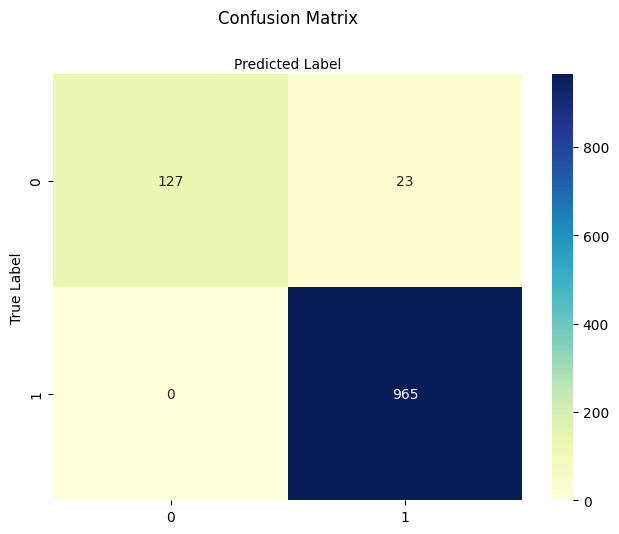

In [8]:
import numpy as np
import seaborn as sns
class_names = ['Ham', 'Spam']

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [12]:
#accuracy scores
accuracy = accuracy_score(Y_test, y_predict)
roc_auc = roc_auc_score(Y_test, y_predict)
print("accuracy: ", accuracy)
print("ROC-AUC score: ", roc_auc)

accuracy:  0.979372197309417
ROC-AUC score:  0.9233333333333333
